In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
print(df.shape)
df.head()

(1200000, 21)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


## Outlier

In [5]:
def detect_outliers_in_columns(df):

    outlier_columns = []
    numerical_cols = df.select_dtypes(include=['int64']).columns

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)
    return outlier_columns

def count_of_outliers(df, outlier_columns): 
    outlier_counts = {}
    for col in outlier_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outlier_count
    return outlier_counts


def cap_outliers(df, outlier_columns):
    for col in outlier_columns:
        if col != 'Premium Amount':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
    

            df.loc[df[col] < lower_bound, col] = lower_bound
            df.loc[df[col] > upper_bound, col] = upper_bound
    
    return df


outlier_columns = detect_outliers_in_columns(df)
print("Columns with outliers:", outlier_columns)
outlier_counts = count_of_outliers(df, outlier_columns)
print("Outlier counts per column:", outlier_counts)
# df_capped = cap_outliers(df, outlier_columns)
# outlier_counts = count_of_outliers(df, outlier_columns)
# print("Outlier counts per column:", outlier_counts)

Columns with outliers: []
Outlier counts per column: {}


# Missing Value

In [6]:
df.isnull().sum()/len(df)*100

id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64

In [7]:
## Removing Unncessary data
df.drop(columns = ['Previous Claims','Occupation','Policy Start Date'] , inplace = True)

In [140]:
df.isnull().sum()/len(df)*100

id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.500000,346410.305851,0.000000,299999.750000,599999.500000,899999.250000,1.199999e+06
Age,1181295.0,41.145563,13.539950,18.000000,30.000000,41.000000,53.000000,6.400000e+01
Annual Income,1155051.0,32745.217777,32179.506124,1.000000,8001.000000,23911.000000,44634.000000,1.499970e+05
Number of Dependents,1090328.0,2.009934,1.417338,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Health Score,1125924.0,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,5.897591e+01
Vehicle Age,1199994.0,9.569889,5.776189,0.000000,5.000000,10.000000,15.000000,1.900000e+01
Credit Score,1062118.0,592.924350,149.981945,300.000000,468.000000,595.000000,721.000000,8.490000e+02
Insurance Duration,1199999.0,5.018219,2.594331,1.000000,3.000000,5.000000,7.000000,9.000000e+00
Premium Amount,1200000.0,1102.544822,864.998859,20.000000,514.000000,872.000000,1509.000000,4.999000e+03


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Vehicle Age           1199994 non-null  float64
 11  Credit Score          1062118 non-null  float64
 12  Insurance Duration    1199999 non-null  float64
 13  Customer Feedback     1122176 non-null  object 
 14  Smoking Status        1200000 non-

In [8]:
col = []
for i in df.select_dtypes(include=['float64']).columns:
    if df[i].isnull().sum()/len(df)*100 > 0:
        col.append(i)

In [144]:
col

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration']

In [9]:
for i in col:
    df[i].fillna(df[i].median(), inplace=True)
df.isnull().sum()/len(df)*100

id                      0.000000
Age                     0.000000
Gender                  0.000000
Annual Income           0.000000
Marital Status          1.544083
Number of Dependents    0.000000
Education Level         0.000000
Health Score            0.000000
Location                0.000000
Policy Type             0.000000
Vehicle Age             0.000000
Credit Score            0.000000
Insurance Duration      0.000000
Customer Feedback       6.485333
Smoking Status          0.000000
Exercise Frequency      0.000000
Property Type           0.000000
Premium Amount          0.000000
dtype: float64

In [146]:
df['Marital Status'].value_counts()/len(df)*100

Marital Status
Single      32.949250
Married     32.859667
Divorced    32.647000
Name: count, dtype: float64

In [147]:
df['Customer Feedback'].value_counts()/len(df)*100

Customer Feedback
Average    31.492083
Poor       31.293167
Good       30.729417
Name: count, dtype: float64

In [10]:
df['Customer Feedback'].fillna(df['Customer Feedback'].mode()[0], inplace=True)
df['Marital Status'].fillna(df['Marital Status'].mode()[0], inplace=True)

In [149]:
df.isnull().sum()/len(df)*100

id                      0.0
Age                     0.0
Gender                  0.0
Annual Income           0.0
Marital Status          0.0
Number of Dependents    0.0
Education Level         0.0
Health Score            0.0
Location                0.0
Policy Type             0.0
Vehicle Age             0.0
Credit Score            0.0
Insurance Duration      0.0
Customer Feedback       0.0
Smoking Status          0.0
Exercise Frequency      0.0
Property Type           0.0
Premium Amount          0.0
dtype: float64

In [150]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Location,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,22.598761,Urban,Premium,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,15.569731,Rural,Comprehensive,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,47.177549,Suburban,Premium,14.0,595.0,3.0,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,10.938144,Rural,Basic,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,20.376094,Rural,Premium,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0


In [11]:
for col in df.columns[2:]:
    print(col , df[col].value_counts())
    print("***************************************")

Gender Gender
Male      602571
Female    597429
Name: count, dtype: int64
***************************************
Annual Income Annual Income
23911.0     44955
7073.0       1039
16054.0      1019
14094.0       916
24897.0       914
            ...  
69406.0         1
109305.0        1
101285.0        1
79277.0         1
23202.0         1
Name: count, Length: 88593, dtype: int64
***************************************
Marital Status Marital Status
Single      413920
Married     394316
Divorced    391764
Name: count, dtype: int64
***************************************
Number of Dependents Number of Dependents
2.0    324985
3.0    221475
4.0    220340
0.0    218124
1.0    215076
Name: count, dtype: int64
***************************************
Education Level Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64
***************************************
Health Score Health Score
24.578648    74076
19.927241      12

In [152]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Location,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,22.598761,Urban,Premium,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,15.569731,Rural,Comprehensive,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,47.177549,Suburban,Premium,14.0,595.0,3.0,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,10.938144,Rural,Basic,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,20.376094,Rural,Premium,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0


In [12]:
df.drop(columns = ['Location','Exercise Frequency'] , inplace = True)

In [154]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,22.598761,Premium,17.0,372.0,5.0,Poor,No,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,15.569731,Comprehensive,12.0,694.0,2.0,Average,Yes,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,47.177549,Premium,14.0,595.0,3.0,Good,Yes,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,10.938144,Basic,0.0,367.0,1.0,Poor,Yes,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,20.376094,Premium,8.0,598.0,4.0,Poor,Yes,House,2022.0


In [13]:
df.drop(columns = ['id'] , inplace = True)

In [156]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,22.598761,Premium,17.0,372.0,5.0,Poor,No,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,15.569731,Comprehensive,12.0,694.0,2.0,Average,Yes,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,47.177549,Premium,14.0,595.0,3.0,Good,Yes,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,10.938144,Basic,0.0,367.0,1.0,Poor,Yes,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,20.376094,Premium,8.0,598.0,4.0,Poor,Yes,House,2022.0


# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [15]:
lab = LabelEncoder()
df['Gender' ]  = lab.fit_transform(df['Gender'])
df['Smoking Status' ]  = lab.fit_transform(df['Smoking Status'])

In [101]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,0,19.0,0,10049.0,Married,1.0,Bachelor's,22.598761,Premium,17.0,372.0,5.0,Poor,0,House,2869.0
1,1,39.0,0,31678.0,Divorced,3.0,Master's,15.569731,Comprehensive,12.0,694.0,2.0,Average,1,House,1483.0
2,2,23.0,1,25602.0,Divorced,3.0,High School,47.177549,Premium,14.0,595.0,3.0,Good,1,House,567.0
3,3,21.0,1,141855.0,Married,2.0,Bachelor's,10.938144,Basic,0.0,367.0,1.0,Poor,1,Apartment,765.0
4,4,21.0,1,39651.0,Single,1.0,Bachelor's,20.376094,Premium,8.0,598.0,4.0,Poor,1,House,2022.0


In [159]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [16]:
Marital_Status = ['Single', 'Married', 'Divorced']  
ordinal_encoder = OrdinalEncoder(categories=[Marital_Status])
df['Marital Status'] = ordinal_encoder.fit_transform(df[['Marital Status']])

In [105]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,0,19.0,0,10049.0,1.0,1.0,Bachelor's,22.598761,Premium,17.0,372.0,5.0,Poor,0,House,2869.0
1,1,39.0,0,31678.0,2.0,3.0,Master's,15.569731,Comprehensive,12.0,694.0,2.0,Average,1,House,1483.0
2,2,23.0,1,25602.0,2.0,3.0,High School,47.177549,Premium,14.0,595.0,3.0,Good,1,House,567.0
3,3,21.0,1,141855.0,1.0,2.0,Bachelor's,10.938144,Basic,0.0,367.0,1.0,Poor,1,Apartment,765.0
4,4,21.0,1,39651.0,0.0,1.0,Bachelor's,20.376094,Premium,8.0,598.0,4.0,Poor,1,House,2022.0


In [106]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [17]:
Education_Level = ["High School", "Bachelor's","Master's","PhD"]  
ordinal_encoder = OrdinalEncoder(categories=[Education_Level])
df['Education Level'] = ordinal_encoder.fit_transform(df[['Education Level']])

In [108]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,0,19.0,0,10049.0,1.0,1.0,1.0,22.598761,Premium,17.0,372.0,5.0,Poor,0,House,2869.0
1,1,39.0,0,31678.0,2.0,3.0,2.0,15.569731,Comprehensive,12.0,694.0,2.0,Average,1,House,1483.0
2,2,23.0,1,25602.0,2.0,3.0,0.0,47.177549,Premium,14.0,595.0,3.0,Good,1,House,567.0
3,3,21.0,1,141855.0,1.0,2.0,1.0,10.938144,Basic,0.0,367.0,1.0,Poor,1,Apartment,765.0
4,4,21.0,1,39651.0,0.0,1.0,1.0,20.376094,Premium,8.0,598.0,4.0,Poor,1,House,2022.0


In [109]:
df['Policy Type'].unique()

array(['Premium', 'Comprehensive', 'Basic'], dtype=object)

In [18]:
Policy_Type = ['Basic', 'Comprehensive', 'Premium']
ordinal_encoder = OrdinalEncoder(categories=[Policy_Type])
df['Policy Type'] = ordinal_encoder.fit_transform(df[['Policy Type']])

In [112]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,0,19.0,0,10049.0,1.0,1.0,1.0,22.598761,2.0,17.0,372.0,5.0,Poor,0,House,2869.0
1,1,39.0,0,31678.0,2.0,3.0,2.0,15.569731,1.0,12.0,694.0,2.0,Average,1,House,1483.0
2,2,23.0,1,25602.0,2.0,3.0,0.0,47.177549,2.0,14.0,595.0,3.0,Good,1,House,567.0
3,3,21.0,1,141855.0,1.0,2.0,1.0,10.938144,0.0,0.0,367.0,1.0,Poor,1,Apartment,765.0
4,4,21.0,1,39651.0,0.0,1.0,1.0,20.376094,2.0,8.0,598.0,4.0,Poor,1,House,2022.0


In [113]:
df['Customer Feedback'].unique()

array(['Poor', 'Average', 'Good'], dtype=object)

In [19]:
Customer_Feedback = ['Poor', 'Average', 'Good']
ordinal_encoder = OrdinalEncoder(categories=[Customer_Feedback])
df['Customer Feedback'] = ordinal_encoder.fit_transform(df[['Customer Feedback']])

In [115]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,0,19.0,0,10049.0,1.0,1.0,1.0,22.598761,2.0,17.0,372.0,5.0,0.0,0,House,2869.0
1,1,39.0,0,31678.0,2.0,3.0,2.0,15.569731,1.0,12.0,694.0,2.0,1.0,1,House,1483.0
2,2,23.0,1,25602.0,2.0,3.0,0.0,47.177549,2.0,14.0,595.0,3.0,2.0,1,House,567.0
3,3,21.0,1,141855.0,1.0,2.0,1.0,10.938144,0.0,0.0,367.0,1.0,0.0,1,Apartment,765.0
4,4,21.0,1,39651.0,0.0,1.0,1.0,20.376094,2.0,8.0,598.0,4.0,0.0,1,House,2022.0


In [116]:
df['Property Type'].unique()

array(['House', 'Apartment', 'Condo'], dtype=object)

In [20]:
Property_Type = ['House', 'Apartment', 'Condo']
ordinal_encoder = OrdinalEncoder(categories=[Property_Type])
df['Property Type'] = ordinal_encoder.fit_transform(df[['Property Type']])

In [165]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,19.0,0,10049.0,1.0,1.0,1.0,22.598761,2.0,17.0,372.0,5.0,0.0,0,0.0,2869.0
1,39.0,0,31678.0,2.0,3.0,2.0,15.569731,1.0,12.0,694.0,2.0,1.0,1,0.0,1483.0
2,23.0,1,25602.0,2.0,3.0,0.0,47.177549,2.0,14.0,595.0,3.0,2.0,1,0.0,567.0
3,21.0,1,141855.0,1.0,2.0,1.0,10.938144,0.0,0.0,367.0,1.0,0.0,1,1.0,765.0
4,21.0,1,39651.0,0.0,1.0,1.0,20.376094,2.0,8.0,598.0,4.0,0.0,1,0.0,2022.0


# Independent and Dependent

In [21]:
y = df['Premium Amount']
x = df.drop(columns =['Premium Amount'])

In [167]:
x.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type
0,19.0,0,10049.0,1.0,1.0,1.0,22.598761,2.0,17.0,372.0,5.0,0.0,0,0.0
1,39.0,0,31678.0,2.0,3.0,2.0,15.569731,1.0,12.0,694.0,2.0,1.0,1,0.0
2,23.0,1,25602.0,2.0,3.0,0.0,47.177549,2.0,14.0,595.0,3.0,2.0,1,0.0
3,21.0,1,141855.0,1.0,2.0,1.0,10.938144,0.0,0.0,367.0,1.0,0.0,1,1.0
4,21.0,1,39651.0,0.0,1.0,1.0,20.376094,2.0,8.0,598.0,4.0,0.0,1,0.0


## Scaling

In [22]:
from sklearn.preprocessing import  StandardScaler


scaler = StandardScaler()
x_train_fit = scaler.fit_transform(x)
x_train_scaled = pd.DataFrame(x_train_fit, columns=x.columns)

In [23]:
x_train_scaled.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type
0,-1.648301,-1.004294,-0.707414,0.022539,-0.746862,-0.465410,-0.249610,1.221087,1.286338,-1.567375,-0.007023,-1.262644,-1.003127,-1.224038
1,-0.159542,-1.004294,-0.023289,1.243266,0.733500,0.433367,-0.844110,-0.003359,0.420713,0.714630,-1.163391,0.007159,0.996883,-1.224038
2,-1.350549,0.995724,-0.215473,1.243266,0.733500,-1.364188,1.829212,1.221087,0.766963,0.013020,-0.777935,1.276961,0.996883,-1.224038
3,-1.499425,0.995724,3.461605,0.022539,-0.006681,-0.465410,-1.235840,-1.227805,-1.656788,-1.602810,-1.548847,-1.262644,0.996883,0.000690
4,-1.499425,0.995724,0.228896,-1.198188,-0.746862,-0.465410,-0.437598,1.221087,-0.271787,0.034281,-0.392479,-1.262644,0.996883,-1.224038


In [33]:
### Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_scaled, y, test_size=0.2, random_state=9)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(960000, 14)
(960000,)
(240000, 14)
(240000,)


# Model

In [35]:
### Regression

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


### Model Part --> Regression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error

In [30]:
# Correct dictionary definition with key-value pairs
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    # 'LightGBM Regressor': LGBMRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0)  # Suppress CatBoost output
}

Linear Regression Train MSE: 748131.5529
Linear Regression Train MAE: 668.5783
Linear Regression Train R²: 0.0011

Linear Regression Test MSE: 744679.2958
Linear Regression Test MAE: 667.7249
Linear Regression Test R²: 0.0010

Linear Regression Test RMSLE: 1.1689



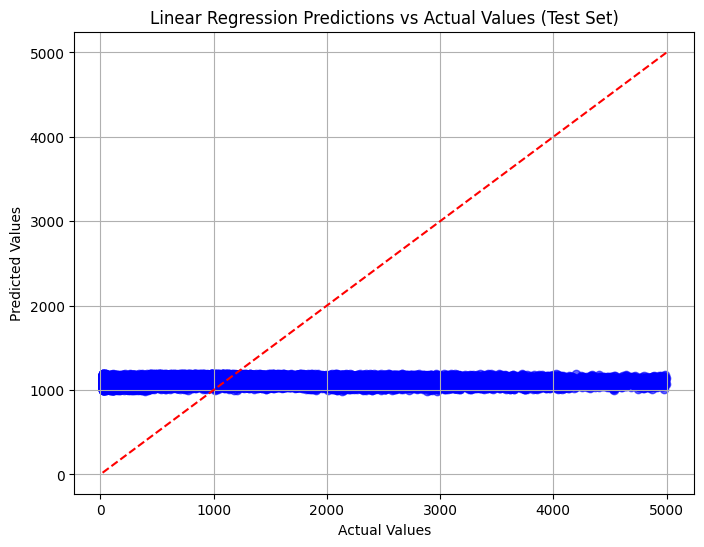

Gradient Boosting Regressor Train MSE: 738155.3786
Gradient Boosting Regressor Train MAE: 662.8929
Gradient Boosting Regressor Train R²: 0.0144

Gradient Boosting Regressor Test MSE: 735048.1568
Gradient Boosting Regressor Test MAE: 661.9594
Gradient Boosting Regressor Test R²: 0.0139

Gradient Boosting Regressor Test RMSLE: 1.1629



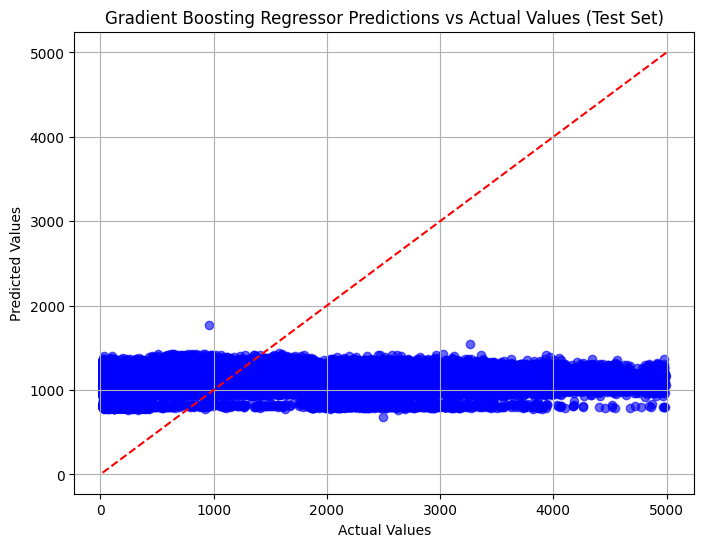

XGBoost Regressor Train MSE: 718985.2433
XGBoost Regressor Train MAE: 651.6818
XGBoost Regressor Train R²: 0.0400

XGBoost Regressor Test MSE: 731757.6034
XGBoost Regressor Test MAE: 657.5556
XGBoost Regressor Test R²: 0.0183

XGBoost Regressor Test RMSLE: 1.1579



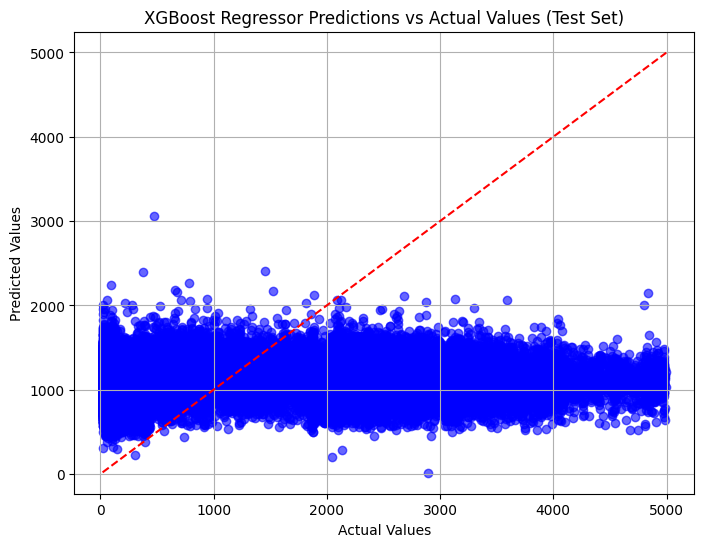

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 14
[LightGBM] [Info] Start training from score 1103.314955
LightGBM Regressor Train MSE: 729996.4221
LightGBM Regressor Train MAE: 657.2755
LightGBM Regressor Train R²: 0.0253

LightGBM Regressor Test MSE: 730069.7272
LightGBM Regressor Test MAE: 657.5544
LightGBM Regressor Test R²: 0.0206

LightGBM Regressor Test RMSLE: 1.1585



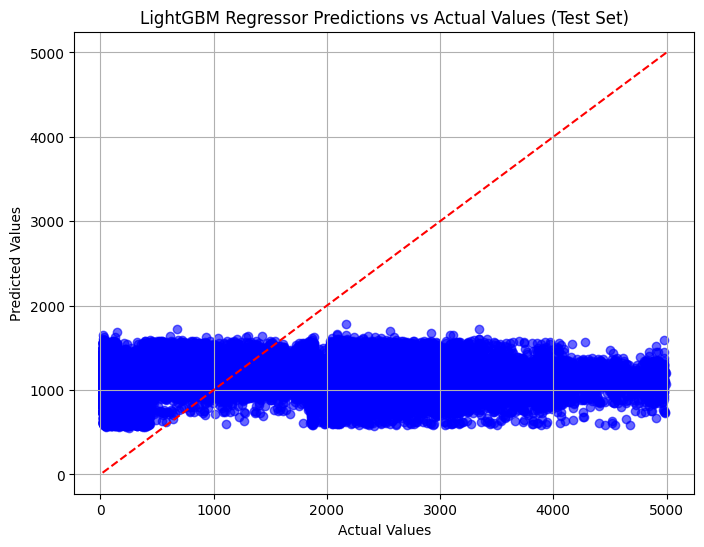

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [31]:
# Dictionary to store results for later comparison
results = {}

# Iterate through models and create pipelines
for name, model in models.items():
    # Create the pipeline with just the regressor (no scaling since it's already done)
    pipeline = Pipeline(steps=[('regressor', model)])

    # Fit the model on the training data
    pipeline.fit(x_train, y_train)

    # Make predictions on the training set
    y_train_pred = pipeline.predict(x_train)

    # Calculate metrics for the training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_pred))

    # Print metrics for the training set
    print(f'{name} Train MSE: {mse_train:.4f}')
    print(f'{name} Train MAE: {mae_train:.4f}')
    print(f'{name} Train R²: {r2_train:.4f}\n')

    # Make predictions on the test set
    y_test_pred = pipeline.predict(x_test)

    # Calculate metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

    # Store results in the dictionary for comparison
    results[name] = {
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train MAE': mae_train,
        'Test MAE': mae_test,
        'Train R²': r2_train,
        'Test R²': r2_test,
        'Train rmsle':rmsle_train,
        'Test rmsle':rmsle_test
    }

    # Print metrics for the test set
    print(f'{name} Test MSE: {mse_test:.4f}')
    print(f'{name} Test MAE: {mae_test:.4f}')
    print(f'{name} Test R²: {r2_test:.4f}\n')
    print(f'{name} Test RMSLE: {rmsle_test:.4f}\n')
    # rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

    # Plot predictions vs actual values for the test set
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} Predictions vs Actual Values (Test Set)')
    plt.grid(True)
    plt.show()

# Optional: Display all results as a summary DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

## Linear

In [38]:
linear = LinearRegression()
linear.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = linear.predict(x_train)

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_pred))

# Print metrics for the training set
print(f'{name} Train MSE: {mse_train:.4f}')
print(f'{name} Train MAE: {mae_train:.4f}')
print(f'{name} Train R²: {r2_train:.4f}')
print(f'{name} Train RMSLE: {rmsle_train:.4f}')


# Make predictions on the training set
y_test_pred = linear.predict(x_test)

# Calculate metrics for the training set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

# Print metrics for the training set
print(f'{name} Train MSE: {mse_test:.4f}')
print(f'{name} Train MAE: {mae_test:.4f}')
print(f'{name} Train R²: {r2_test:.4f}')
print(f'{name} Train RMSLE: {rmsle_test:.4f}')

CatBoost Regressor Train MSE: 748131.5529
CatBoost Regressor Train MAE: 668.5783
CatBoost Regressor Train R²: 0.0011
CatBoost Regressor Train RMSLE: 1.1693
CatBoost Regressor Train MSE: 744679.2958
CatBoost Regressor Train MAE: 667.7249
CatBoost Regressor Train R²: 0.0010
CatBoost Regressor Train RMSLE: 1.1689


## Gradient Boosting Regressor

In [39]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = gbr.predict(x_train)

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_pred))

# Print metrics for the training set
print(f'{name} Train MSE: {mse_train:.4f}')
print(f'{name} Train MAE: {mae_train:.4f}')
print(f'{name} Train R²: {r2_train:.4f}')
print(f'{name} Train RMSLE: {rmsle_train:.4f}')


# Make predictions on the training set
y_test_pred = gbr.predict(x_test)

# Calculate metrics for the training set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

# Print metrics for the training set
print(f'{name} Train MSE: {mse_test:.4f}')
print(f'{name} Train MAE: {mae_test:.4f}')
print(f'{name} Train R²: {r2_test:.4f}')
print(f'{name} Train RMSLE: {rmsle_test:.4f}')

CatBoost Regressor Train MSE: 738155.3786
CatBoost Regressor Train MAE: 662.8929
CatBoost Regressor Train R²: 0.0144
CatBoost Regressor Train RMSLE: 1.1630
CatBoost Regressor Train MSE: 735047.8700
CatBoost Regressor Train MAE: 661.9593
CatBoost Regressor Train R²: 0.0139
CatBoost Regressor Train RMSLE: 1.1629


## XGBoost Regressor

In [41]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = xgb.predict(x_train)

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_pred))

# Print metrics for the training set
print(f'{name} Train MSE: {mse_train:.4f}')
print(f'{name} Train MAE: {mae_train:.4f}')
print(f'{name} Train R²: {r2_train:.4f}')
print(f'{name} Train RMSLE: {rmsle_train:.4f}')


# Make predictions on the training set
y_test_pred = xgb.predict(x_test)

# Calculate metrics for the training set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

# Print metrics for the training set
print(f'{name} Train MSE: {mse_test:.4f}')
print(f'{name} Train MAE: {mae_test:.4f}')
print(f'{name} Train R²: {r2_test:.4f}')
print(f'{name} Train RMSLE: {rmsle_test:.4f}')

CatBoost Regressor Train MSE: 718985.2433
CatBoost Regressor Train MAE: 651.6818
CatBoost Regressor Train R²: 0.0400
CatBoost Regressor Train RMSLE: 1.1518
CatBoost Regressor Train MSE: 731757.6034
CatBoost Regressor Train MAE: 657.5556
CatBoost Regressor Train R²: 0.0183
CatBoost Regressor Train RMSLE: 1.1579


## Light gradident Boosting Regressor

In [42]:
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = lgbm.predict(x_train)

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_pred))

# Print metrics for the training set
print(f'{name} Train MSE: {mse_train:.4f}')
print(f'{name} Train MAE: {mae_train:.4f}')
print(f'{name} Train R²: {r2_train:.4f}')
print(f'{name} Train RMSLE: {rmsle_train:.4f}')


# Make predictions on the training set
y_test_pred = lgbm.predict(x_test)

# Calculate metrics for the training set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

# Print metrics for the training set
print(f'{name} Train MSE: {mse_test:.4f}')
print(f'{name} Train MAE: {mae_test:.4f}')
print(f'{name} Train R²: {r2_test:.4f}')
print(f'{name} Train RMSLE: {rmsle_test:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 14
[LightGBM] [Info] Start training from score 1103.314955
CatBoost Regressor Train MSE: 729996.4221
CatBoost Regressor Train MAE: 657.2755
CatBoost Regressor Train R²: 0.0253
CatBoost Regressor Train RMSLE: 1.1574
CatBoost Regressor Train MSE: 730069.7272
CatBoost Regressor Train MAE: 657.5544
CatBoost Regressor Train R²: 0.0206
CatBoost Regressor Train RMSLE: 1.1585


## CatBoost Regressor

In [44]:
# cbr = CatBoostRegressor()
# cbr.fit(x_train, y_train)

# # Make predictions on the training set
# y_train_pred = cbr.predict(x_train)

# # Calculate metrics for the training set
# mse_train = mean_squared_error(y_train, y_train_pred)
# mae_train = mean_absolute_error(y_train, y_train_pred)
# r2_train = r2_score(y_train, y_train_pred)
# rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_pred))

# # Print metrics for the training set
# print(f'{name} Train MSE: {mse_train:.4f}')
# print(f'{name} Train MAE: {mae_train:.4f}')
# print(f'{name} Train R²: {r2_train:.4f}')
# print(f'{name} Train RMSLE: {rmsle_train:.4f}')


# # Make predictions on the training set
# y_test_pred = cbr.predict(x_test)

# # Calculate metrics for the training set
# mse_test = mean_squared_error(y_test, y_test_pred)
# mae_test = mean_absolute_error(y_test, y_test_pred)
# r2_test = r2_score(y_test, y_test_pred)
# rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_test_pred))

# # Print metrics for the training set
# print(f'{name} Train MSE: {mse_test:.4f}')
# print(f'{name} Train MAE: {mae_test:.4f}')
# print(f'{name} Train R²: {r2_test:.4f}')
# print(f'{name} Train RMSLE: {rmsle_test:.4f}')

In [45]:
test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')
print(test.shape)
test.head()

(800000, 20)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [46]:
test.drop(columns = ['Previous Claims','Occupation','Policy Start Date'] , inplace = True)

In [47]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Location,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,7.657981,Rural,Basic,19.0,NaN,1.0,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,13.381379,Suburban,Premium,14.0,372.0,8.0,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,24.354527,Urban,Comprehensive,16.0,819.0,9.0,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,5.136225,Suburban,Comprehensive,3.0,770.0,5.0,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,11.844155,Suburban,Premium,14.0,755.0,7.0,Average,No,Weekly,House


In [48]:
test.isnull().sum()/len(df)*100

id                      0.000000
Age                     1.040750
Gender                  0.000000
Annual Income           2.488333
Marital Status          1.028000
Number of Dependents    6.094167
Education Level         0.000000
Health Score            4.120750
Location                0.000000
Policy Type             0.000000
Vehicle Age             0.000250
Credit Score            7.620917
Insurance Duration      0.000167
Customer Feedback       4.356333
Smoking Status          0.000000
Exercise Frequency      0.000000
Property Type           0.000000
dtype: float64

In [49]:
outlier_columns = detect_outliers_in_columns(test)
print("Columns with outliers:", outlier_columns)
outlier_counts = count_of_outliers(test, outlier_columns)
print("Outlier counts per column:", outlier_counts)

Columns with outliers: []
Outlier counts per column: {}


In [52]:
col = []
for i in test.select_dtypes(include=['float64']).columns:
    if test[i].isnull().sum()/len(test)*100 > 0:
        col.append(i)

In [53]:
col

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration']

In [54]:
for i in col:
    test[i].fillna(test[i].median(), inplace=True)
test.isnull().sum()/len(test)*100

id                      0.0000
Age                     0.0000
Gender                  0.0000
Annual Income           0.0000
Marital Status          1.5420
Number of Dependents    0.0000
Education Level         0.0000
Health Score            0.0000
Location                0.0000
Policy Type             0.0000
Vehicle Age             0.0000
Credit Score            0.0000
Insurance Duration      0.0000
Customer Feedback       6.5345
Smoking Status          0.0000
Exercise Frequency      0.0000
Property Type           0.0000
dtype: float64

In [55]:
test['Customer Feedback'].fillna(test['Customer Feedback'].mode()[0], inplace=True)
test['Marital Status'].fillna(test['Marital Status'].mode()[0], inplace=True)

In [56]:
test.drop(columns = ['Location','Exercise Frequency'] , inplace = True)

In [57]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type
0,1200000,28.0,Female,2310.0,Single,4.0,Bachelor's,7.657981,Basic,19.0,595.0,1.0,Poor,Yes,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,13.381379,Premium,14.0,372.0,8.0,Good,Yes,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,24.354527,Comprehensive,16.0,819.0,9.0,Average,Yes,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,5.136225,Comprehensive,3.0,770.0,5.0,Poor,Yes,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,11.844155,Premium,14.0,755.0,7.0,Average,No,House


In [61]:
test.drop(columns = ['id'] , inplace = True)


In [62]:
test.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type
0,28.0,Female,2310.0,Single,4.0,Bachelor's,7.657981,Basic,19.0,595.0,1.0,Poor,Yes,House
1,31.0,Female,126031.0,Married,2.0,Master's,13.381379,Premium,14.0,372.0,8.0,Good,Yes,Apartment
2,47.0,Female,17092.0,Divorced,0.0,PhD,24.354527,Comprehensive,16.0,819.0,9.0,Average,Yes,Condo
3,28.0,Female,30424.0,Divorced,3.0,PhD,5.136225,Comprehensive,3.0,770.0,5.0,Poor,Yes,House
4,24.0,Male,10863.0,Divorced,2.0,High School,11.844155,Premium,14.0,755.0,7.0,Average,No,House


In [63]:
lab = LabelEncoder()
test['Gender' ]  = lab.fit_transform(test['Gender'])
test['Smoking Status' ]  = lab.fit_transform(test['Smoking Status'])

Marital_Status = ['Single', 'Married', 'Divorced']  
ordinal_encoder = OrdinalEncoder(categories=[Marital_Status])
test['Marital Status'] = ordinal_encoder.fit_transform(test[['Marital Status']])

Education_Level = ["High School", "Bachelor's","Master's","PhD"]  
ordinal_encoder = OrdinalEncoder(categories=[Education_Level])
test['Education Level'] = ordinal_encoder.fit_transform(test[['Education Level']])



Policy_Type = ['Basic', 'Comprehensive', 'Premium']
ordinal_encoder = OrdinalEncoder(categories=[Policy_Type])
test['Policy Type'] = ordinal_encoder.fit_transform(test[['Policy Type']])

Customer_Feedback = ['Poor', 'Average', 'Good']
ordinal_encoder = OrdinalEncoder(categories=[Customer_Feedback])
test['Customer Feedback'] = ordinal_encoder.fit_transform(test[['Customer Feedback']])

Property_Type = ['House', 'Apartment', 'Condo']
ordinal_encoder = OrdinalEncoder(categories=[Property_Type])
test['Property Type'] = ordinal_encoder.fit_transform(test[['Property Type']])

In [64]:
test.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type
0,28.0,0,2310.0,0.0,4.0,1.0,7.657981,0.0,19.0,595.0,1.0,0.0,1,0.0
1,31.0,0,126031.0,1.0,2.0,2.0,13.381379,2.0,14.0,372.0,8.0,2.0,1,1.0
2,47.0,0,17092.0,2.0,0.0,3.0,24.354527,1.0,16.0,819.0,9.0,1.0,1,2.0
3,28.0,0,30424.0,2.0,3.0,3.0,5.136225,1.0,3.0,770.0,5.0,0.0,1,0.0
4,24.0,1,10863.0,2.0,2.0,0.0,11.844155,2.0,14.0,755.0,7.0,1.0,0,0.0


In [65]:
test_scaled = scaler.fit_transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

In [66]:
test_scaled.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type
0,-0.977856,-1.002726,-0.953410,-1.198169,1.476282,-0.465977,-1.512844,-1.226503,1.633369,0.013135,-1.549472,-1.262463,0.995363,-1.223501
1,-0.754504,-1.002726,2.957034,0.021736,-0.006289,0.432875,-1.028885,1.221973,0.767146,-1.565320,1.149319,1.276303,0.995363,0.000529
2,0.436704,-1.002726,-0.486196,1.241640,-1.488860,1.331727,-0.101018,-0.002265,1.113635,1.598669,1.534861,0.006920,0.995363,1.224560
3,-0.977856,-1.002726,-0.064812,1.241640,0.734997,1.331727,-1.726078,-0.002265,-1.138545,1.251834,-0.007306,-1.262463,0.995363,-1.223501
4,-1.275658,0.997281,-0.683075,1.241640,-0.006289,-1.364829,-1.158870,1.221973,0.767146,1.145659,0.763778,0.006920,-1.004658,-1.223501


In [ ]:
### Model

In [83]:
# Make predictions on the test set
y_pred = lgbm.predict(test_scaled)

In [84]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e12/sample_submission.csv')
sub.head()

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545


In [76]:
sub.shape

(800000, 2)

In [85]:
c = 0
for i in range(len(y_pred)):
    sub.loc[i, 'Premium Amount'] = y_pred[i]
    c =c + 1
print(c)

800000


In [86]:
sub.to_csv('SV_submission_light_boosting_regression.csv',index=False)

In [ ]:
# Linear --- > 95
# GBR -----> 93
# XGBR -----> 92